<a href="https://colab.research.google.com/github/AbuKaisar24/yelp-review-sentiment-analysis/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [99]:
import pandas as pd
import re
import numpy as np
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
import pickle
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [80]:
df=pd.read_csv("gdrive/My Drive/Colab Notebooks/Work/yelp.csv")

In [81]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [82]:
df = df[['text','stars']]

In [83]:
for i in range(5):
    print("Reviews:",i+1)
    print("Text:",df.text[i])

Reviews: 1
Text: My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
Reviews: 2
Text: I have no idea why some people give bad reviews about this place. It goes to

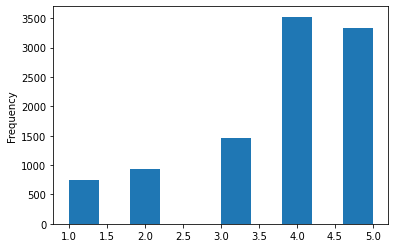

In [84]:
df['stars'].plot(kind='hist')

In [89]:
def preprocess_and_tokenize(data):    
    data = re.sub("(<.*?>)", "", data)
    data = re.sub(r'http\S+', '', data)
    data= re.sub(r"(#[\d\w\.]+)", '', data)
    data= re.sub(r"(@[\d\w\.]+)", '', data)
    data = re.sub("(\\W|\\d)", " ", data)
    data = data.strip()
    data = word_tokenize(data)
    porter = PorterStemmer()
    stem_data = [porter.stem(word) for word in data]
    return stem_data

In [103]:
x = df.text
y = df.stars
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=101)

In [92]:
vect = TfidfVectorizer(tokenizer=preprocess_and_tokenize, sublinear_tf=True, norm='l2', ngram_range=(1, 2))
vect.fit_transform(df.text)
X_train_vect = vect.transform(x_train)
X_test_vect = vect.transform(x_test)

In [109]:
nb = MultinomialNB()

nb.fit(X_train_vect, y_train)

ynb_pred = nb.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ynb_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ynb_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ynb_pred))

Accuracy: 42.45%

F1 Score: 42.45

COnfusion Matrix:
 [[  0   0   0 138   7]
 [  0   0   0 176   2]
 [  0   0   0 297   6]
 [  0   0   0 687  26]
 [  0   0   0 499 162]]


In [108]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train_vect, y_train)

yrf_pred = rf.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yrf_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yrf_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yrf_pred))

Accuracy: 44.80%

F1 Score: 44.80

COnfusion Matrix:
 [[  3   1   0  78  63]
 [  2   0   4 130  42]
 [  0   1   7 235  60]
 [  0   0   1 472 240]
 [  0   0   0 247 414]]


In [111]:
log = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
log.fit(X_train_vect, y_train)

ylog_pred = log.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ylog_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ylog_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ylog_pred))

Accuracy: 51.80%

F1 Score: 51.80

COnfusion Matrix:
 [[ 38   9   5  43  50]
 [  8  17  23  92  38]
 [  2   2  37 217  45]
 [  0   0   9 479 225]
 [  0   0   2 194 465]]


In [110]:
svc = LinearSVC(tol=1e-05)
svc.fit(X_train_vect, y_train)

ysvm_pred = svc.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ysvm_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ysvm_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ysvm_pred))

Accuracy: 55.40%

F1 Score: 55.40

COnfusion Matrix:
 [[ 72  23   8  18  24]
 [ 27  49  43  41  18]
 [ 13   8  90 153  39]
 [  3   2  37 431 240]
 [  1   2   8 184 466]]


In [112]:
svm_model = Pipeline([
    ('tfidf', vect),
    ('clf', svc),
])

In [114]:
filename = 'gdrive/My Drive/Colab Notebooks/Work/tfidf_svm.sav'
pickle.dump(svm_model, open(filename, 'wb'))

In [118]:
model = pickle.load(open(filename, 'rb'))
message = "Thanks to Scott and his awesome staff. You've got a customer for life!! .......... :^)"
model.predict([message])

array([5])